In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [618]:
rdp = pd.read_excel('data.xlsx', index_col=0)

rdp.head()

,GDPPOT_20230726,GDPC1_20230727
observation_date,,
1950-01-01,2218.566586,2186.365
1950-04-01,2248.161822,2253.045
1950-07-01,2277.049682,2340.112
1950-10-01,2306.715167,2384.920
1951-01-01,2336.504742,2417.311


<Axes: xlabel='observation_date', ylabel='GDPC1_20230727'>

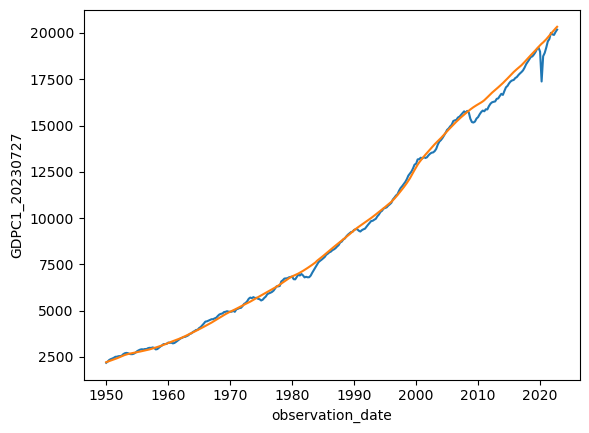

In [619]:
rdp = rdp.dropna()

sns.lineplot(data=rdp, x='observation_date', y='GDPC1_20230727')
sns.lineplot(data=rdp, x='observation_date', y='GDPPOT_20230726')

In [620]:
nrou = pd.read_csv('NROU.csv', index_col=0)

nrou.head()

,NROU
DATE,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [621]:
unrate = pd.read_csv('UNRATE.csv', index_col=0)

unrate.head()

,UNRATE
DATE,
1948-01-01,3.7333333333333333
1948-04-01,3.6666666666666667
1948-07-01,3.7666666666666667
1948-10-01,3.8333333333333333
1949-01-01,4.6666666666666667


In [622]:
unemployment = pd.merge(left=unrate, right=nrou, left_index=True, right_index=True)

unemployment.head()

,UNRATE,NROU
DATE,,
1949-01-01,4.6666666666666667,5.255053
1949-04-01,5.8666666666666667,5.261516
1949-07-01,6.7000000000000000,5.268013
1949-10-01,6.9666666666666667,5.274564
1950-01-01,6.4000000000000000,5.281182


<Axes: xlabel='DATE', ylabel='UNRATE'>

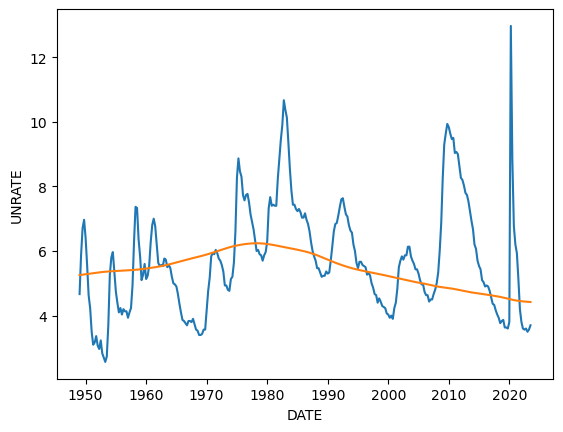

In [623]:
unemployment = unemployment[:-1]
unemployment['UNRATE'] = unemployment['UNRATE'].astype(float)
unemployment.index = pd.to_datetime(unemployment.index)

sns.lineplot(data=unemployment, x='DATE', y='UNRATE')
sns.lineplot(data=unemployment, x='DATE', y='NROU')

In [624]:
data = pd.merge(left=unemployment, right=rdp, left_index=True, right_index=True)

data.head()

,UNRATE,NROU,GDPPOT_20230726,GDPC1_20230727
1950-01-01,6.400000,5.281182,2218.566586,2186.365
1950-04-01,5.566667,5.287866,2248.161822,2253.045
1950-07-01,4.633333,5.294604,2277.049682,2340.112
1950-10-01,4.233333,5.301367,2306.715167,2384.920
1951-01-01,3.500000,5.308113,2336.504742,2417.311


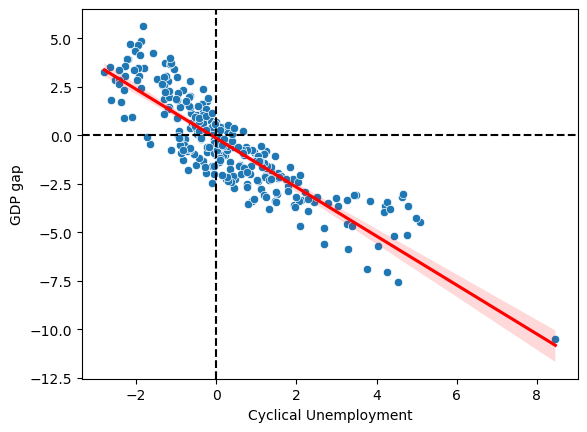

In [625]:
data['GDP gap'] = (data['GDPC1_20230727'] - data['GDPPOT_20230726']) / data['GDPPOT_20230726'] * 100

data['Cyclical Unemployment'] = data['UNRATE'] - data['NROU']

sns.scatterplot(data=data, x='Cyclical Unemployment', y='GDP gap')
sns.regplot(data=data, x='Cyclical Unemployment', y='GDP gap', scatter=False, color='r')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

In [626]:
model = sm.OLS(data['GDP gap'], data['Cyclical Unemployment']).fit()

print(model.summary2())

                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.772   
Dependent Variable:     GDP gap          AIC:                         931.2775
Date:                   2023-12-16 01:04 BIC:                         934.9543
No. Observations:       292              Log-Likelihood:              -464.64 
Df Model:               1                F-statistic:                 987.6   
Df Residuals:           291              Prob (F-statistic):          1.55e-95
R-squared (uncentered): 0.772            Scale:                       1.4162  
-------------------------------------------------------------------------------
                           Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------------------
Cyclical Unemployment     -1.2784    0.0407  -31.4267  0.0000  -1.3584  -1.1983
------------------------------------------------------------------------

In [627]:
model = sm.OLS(data['GDP gap'], sm.add_constant(data['Cyclical Unemployment'])).fit()

print(model.summary2())

                   Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.764   
Dependent Variable:    GDP gap           AIC:                 928.1463
Date:                  2023-12-16 01:04  BIC:                 935.4998
No. Observations:      292               Log-Likelihood:      -462.07 
Df Model:              1                 F-statistic:         940.5   
Df Residuals:          290               Prob (F-statistic):  5.19e-93
R-squared:             0.764             Scale:               1.3964  
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                 -0.1596   0.0704  -2.2674 0.0241 -0.2982 -0.0211
Cyclical Unemployment -1.2609   0.0411 -30.6671 0.0000 -1.3419 -1.1800
----------------------------------------------------------------------
Omnibus:                 1

Метод Ходрика-Прескотта (HP-фильтр)

In [628]:
data_last = data[data.index.year > 2008].copy()
data_last.index.name = 'date'


gdpc1 = data_last['GDPC1_20230727'].copy()
gdpc1['2019-10-01' : '2021-01-01'] = 19200

In [629]:
cycle, trend_1 = sm.tsa.filters.hpfilter(data_last['GDPC1_20230727'], lamb=100)
cycle, trend_2 = sm.tsa.filters.hpfilter(gdpc1, lamb=600)
data_last['GDPPOT_1'] = trend_1
data_last['GDPPOT_2'] = trend_2

In [630]:
data_last.head()

,UNRATE,NROU,GDPPOT_20230726,GDPC1_20230727,GDP gap,Cyclical Unemployment,GDPPOT_1,GDPPOT_2
date,,,,,,,,
2009-01-01,8.266667,4.875262,15931.698339,15187.475,-4.671337,3.391405,15127.696933,15134.810011
2009-04-01,9.300000,4.869192,15990.652966,15161.772,-5.183534,4.430808,15213.491177,15217.348316
2009-07-01,9.633333,4.863206,16045.761443,15216.647,-5.167187,4.770127,15299.883202,15299.974396
2009-10-01,9.933333,4.857107,16097.706573,15379.155,-4.463689,5.076226,15386.953596,15382.683399
2010-01-01,9.833333,4.850728,16147.438323,15456.059,-4.281666,4.982605,15473.950586,15465.331593


<Axes: xlabel='date', ylabel='GDPPOT_1'>

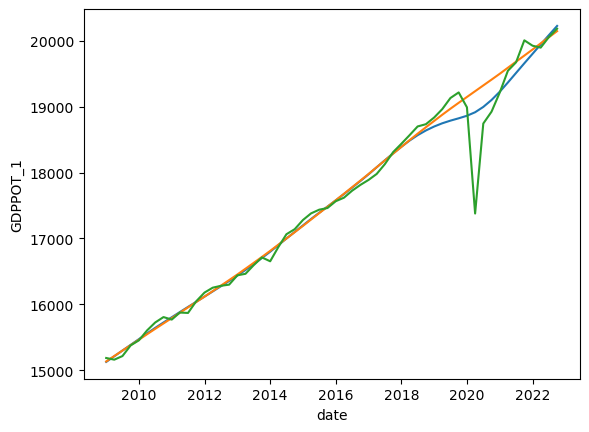

In [631]:
sns.lineplot(data=data_last.reset_index(), x='date', y='GDPPOT_1')
sns.lineplot(data=data_last.reset_index(), x='date', y='GDPPOT_2')
sns.lineplot(data=data_last.reset_index(), x='date', y='GDPC1_20230727')

In [632]:
data_last['GDP_gap_1'] = (data_last['GDPC1_20230727'] - data_last['GDPPOT_1']) / data_last['GDPPOT_1'] * 100
data_last['GDP_gap_2'] = (data_last['GDPC1_20230727'] - data_last['GDPPOT_2']) / data_last['GDPPOT_2'] * 100

In [633]:
model = sm.OLS(data_last['GDP_gap_1'], sm.add_constant(data_last['Cyclical Unemployment'])).fit()

print(model.summary2())

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.264   
Dependent Variable:   GDP_gap_1         AIC:                 170.9423
Date:                 2023-12-16 01:04  BIC:                 174.9930
No. Observations:     56                Log-Likelihood:      -83.471 
Df Model:             1                 F-statistic:         20.69   
Df Residuals:         54                Prob (F-statistic):  3.10e-05
R-squared:            0.277             Scale:               1.1967  
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.5012   0.1833  2.7349 0.0084  0.1338  0.8686
Cyclical Unemployment -0.3003   0.0660 -4.5485 0.0000 -0.4327 -0.1680
---------------------------------------------------------------------
Omnibus:               66.606        Du

In [634]:
model = sm.OLS(data_last['GDP_gap_2'], sm.add_constant(data_last['Cyclical Unemployment'])).fit()

print(model.summary2())

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.198   
Dependent Variable:   GDP_gap_2         AIC:                 190.6947
Date:                 2023-12-16 01:04  BIC:                 194.7454
No. Observations:     56                Log-Likelihood:      -93.347 
Df Model:             1                 F-statistic:         14.55   
Df Residuals:         54                Prob (F-statistic):  0.000353
R-squared:            0.212             Scale:               1.7029  
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.2495   0.2186  1.1413 0.2588 -0.1888  0.6878
Cyclical Unemployment -0.3005   0.0788 -3.8147 0.0004 -0.4584 -0.1426
---------------------------------------------------------------------
Omnibus:               70.487        Du

In [635]:
data_pred = data[data.index.year < 2008].copy()

model = sm.OLS(data_pred['GDP gap'], sm.add_constant(data_pred['Cyclical Unemployment'])).fit()

print(model.summary2())

                   Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.818   
Dependent Variable:    GDP gap           AIC:                 662.6620
Date:                  2023-12-16 01:04  BIC:                 669.5554
No. Observations:      232               Log-Likelihood:      -329.33 
Df Model:              1                 F-statistic:         1037.   
Df Residuals:          230               Prob (F-statistic):  3.60e-87
R-squared:             0.818             Scale:               1.0099  
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                 -0.1140   0.0660  -1.7278 0.0854 -0.2440  0.0160
Cyclical Unemployment -1.5805   0.0491 -32.1972 0.0000 -1.6772 -1.4838
----------------------------------------------------------------------
Omnibus:                6.